In [1]:
import pandas as pd
df=pd.read_csv('ign.csv')

# 1.Number of Games having more than 7 score.

In [2]:
df1=df['score']>7
df2=df[df1]
print('The number of games having score more than 7 is:',df2['score'].count())

The number of games having score more than 7 is: 9800


# 2.How many games got the editors choice in the year 2012 and belonged to the genre RPG

In [3]:
df1=df[['title','editors_choice','release_year','genre']]
df2=(df['editors_choice']=='Y') & (df['genre']=='RPG') & (df['release_year']==2012)
df2=df[df2]
games=list(df2['title'].unique())
print('There were',len(games),'games belonging to the genre *RPG* which got Editors Choice Award in the year 2012,and they are')
for i in range(len(games)):
    print(i+1,games[i])

There were 13 games belonging to the genre *RPG* which got Editors Choice Award in the year 2012,and they are
1 Guild Wars 2
2 World of Warcraft: Mists of Pandaria
3 Pokemon White Version 2
4 Pokemon Black Version 2
5 The World Ends with You: Solo Remix
6 Persona 4 Golden
7 Mass Effect
8 Kingdoms of Amalur: Reckoning
9 Mass Effect 3
10 Legend of Grimrock
11 Xenoblade Chronicles
12 The Last Story
13 The Witcher 2: Assassins of Kings (Enhanced Edition)


# 3.Which genre has the maximum score?

In [4]:
list1=[]
df1=df[['genre','score']]
for name,value in df1.groupby('genre',sort=False):
    list1.append(value['score'].sum())
list1.sort()
#len(list1)
#list1[-1]
#print('The max score is:',list1[-1])
#df1

In [5]:
for name,value in df1.groupby('genre',sort=False):
    #print(name,value['score'].sum())
    if value['score'].sum()==list1[-1]:
        print('The maximum score is of genre -',name,'and it is',list1[-1])

The maximum score is of genre - Action and it is 25161.5


# 4.Which game has the maximum score?

In [6]:
df1=df[['title','score']]
maxfilter=df1['score']>=df1['score'].max()
df2=df1[maxfilter]['title'].unique()  #unique ghetla karan eka game chi multiple times entry aahe platform nusar pc,xbox,ps etc.
print('The games having the maximum score are:')
j=1
for i in df2:
    print(j,i)
    j+=1

The games having the maximum score are:
1 The Legend of Zelda: Ocarina of Time
2 Pokemon Blue Version
3 Pokemon Red Version
4 Joust
5 Shanghai
6 Checkered Flag
7 Super Mario Bros. Deluxe
8 Soulcalibur
9 The Legend of Zelda: Link's Awakening DX
10 Mario Golf [Game Boy Color]
11 Pokemon Yellow: Special Pikachu Edition
12 Sonic The Hedgehog: Pocket Adventure
13 SNK vs. Capcom: Match of the Millennium
14 Magical Tetris Challenge
15 Metal Gear Solid [2000]
16 Pokemon Gold Version
17 Pokemon Silver Version
18 The Legend of Zelda: Oracle of Ages
19 The Legend of Zelda: Oracle of Seasons
20 Dragon Warrior III
21 Tornado Mania
22 Grand Theft Auto IV (Special Edition)
23 Grand Theft Auto IV
24 Metal Gear Solid 4: Guns of the Patriots
25 Metal Gear Solid 4: Guns of the Patriots (Limited Edition)
26 Super Mario Galaxy 2
27 Pac-Man Championship Edition DX
28 Red Dead Redemption -- Undead Nightmare
29 Chrono Trigger
30 Uncharted 3: Drake's Deception
31 Infinity Blade II
32 The Legend of Zelda: Skywa

# 5.Which platform has the highest score?

In [7]:
df1=df[['platform','score']]
# list1=list(df1['platform'].unique())
list2=[]
for name,value in df1.groupby('platform'):
    list2.append(value['score'].sum())
list2.sort()
# list2[-1] #maximum score of platform


In [8]:
for name,value in df1.groupby('platform'):
    if value['score'].sum()==list2[-1]:
        print('The platform',name,'has maximum score and the score is:',list2[-1])

The platform PC has maximum score and the score is: 24086.6


# 6.Average score of Xbox 360 platform

In [9]:
df1=df[['platform','score']]
avg=0
for name,value in df1.groupby('platform'):
    if name=='Xbox 360':
        avg=value['score'].mean()
print('The Average score of Xbox 360 Platform is',avg)

The Average score of Xbox 360 Platform is 7.105334150827714


# 7.Which year had the most releases?

In [10]:
list1=[]
df1=df[['release_year','title']]
for name,value in df1.groupby('release_year'):
    list1.append(value['title'].count())
    #print(name,value['title'].count())
list1.sort()
# print(list1)
for name,value in df1.groupby('release_year'):
    if value['title'].count()==list1[-1]:
        print('The year',name,'had the most releases and the number of releases was:',list1[-1])

The year 2008 had the most releases and the number of releases was: 1915


# 8.How many games were released for both xbox and pc?
    

In [11]:
df1=df[['platform','title']]
for name,value in df1.groupby('platform'):
    if name=='Xbox 360':
        countxbox=value['title'].count()
    if name=='PC':
        countpc=value['title'].count()
print('The number of games released for Xbox 360 were:',countxbox,'\nThe number of games released for PC were:',countpc)

The number of games released for Xbox 360 were: 1631 
The number of games released for PC were: 3370


In [12]:
df2=df[(df['platform']=='Xbox 360') | (df['platform']=='PC')]
count=0
for name,value in df2[['title','platform']].groupby('title',sort=True):
     if value['title'].count()>1:
            count+=1
print ('The number of games released for Xbox and Pc were:',count)

The number of games released for Xbox and Pc were: 550


# PLOTS

## 1.PLOT OF SCORES CATEGORY

In [14]:
list1=list(df['score'].unique())  #x axis i.e unique score
list2=[]
for i in list1:
    a=0
    for j in list(df['score']):
        if j==i:
            a+=1
    list2.append(a)   # number of times unique score has appeared

[0, 11, 0, 1800]

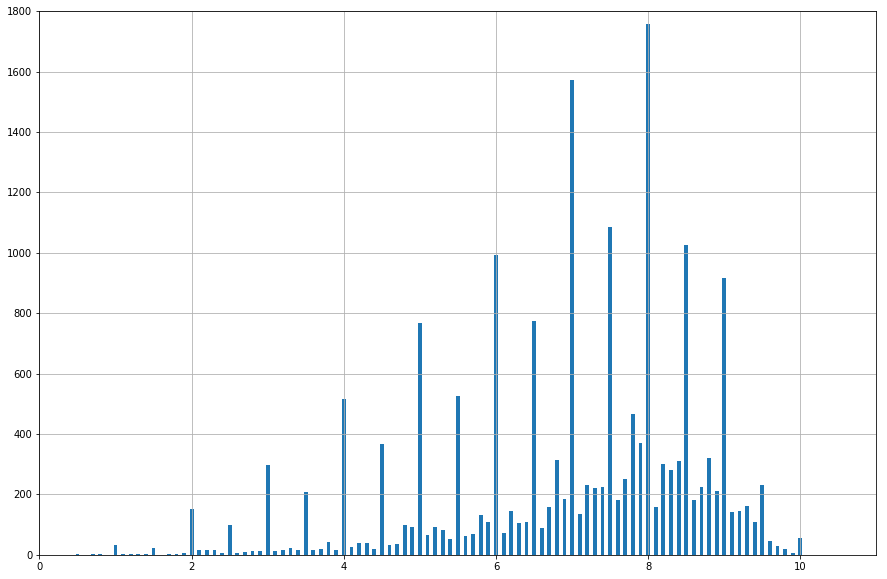

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,10))
plt.bar(list1,list2,width=0.05)
plt.grid()
plt.axis([0,11,0,1800])

(array([  43.,  228.,  491.,  899., 1613., 2100., 3587., 4790., 3932.,
         942.]),
 array([ 0.5 ,  1.45,  2.4 ,  3.35,  4.3 ,  5.25,  6.2 ,  7.15,  8.1 ,
         9.05, 10.  ]),
 <a list of 10 Patch objects>)

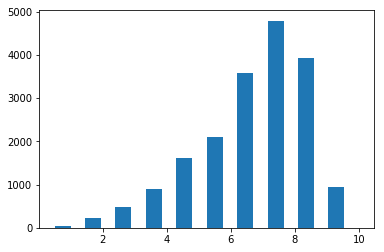

In [16]:
plt.hist(df['score'],width=0.5)

## 2.PLOT OF EDITORS CHOICE

In [17]:
mapping={'Y':1,'N':0}
df2=df
df2['editorschoice']=df['editors_choice'].apply(lambda x:mapping[x])

list1=list(df2['editorschoice'].unique())  #x axis i.e unique score
list2=[]
for i in list1:
    a=0
    for j in list(df2['editorschoice']):
        if j==i:
            a+=1
    list2.append(a)   # number of times unique score has appeared

([<matplotlib.axis.XTick at 0x71c8c120b8>,
 <a list of 2 Text xticklabel objects>)

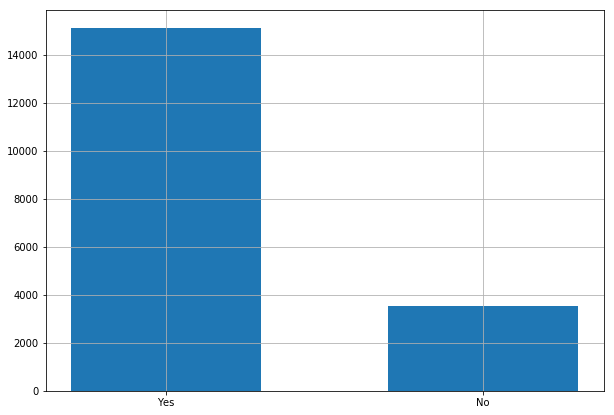

In [18]:
import numpy as np
plt.figure(figsize=(10,7))
plt.bar(list1,list2,width=0.6)
plt.grid()
plt.xticks(np.arange(2),('Yes','No'))

## 3. PLOT OF GENRES

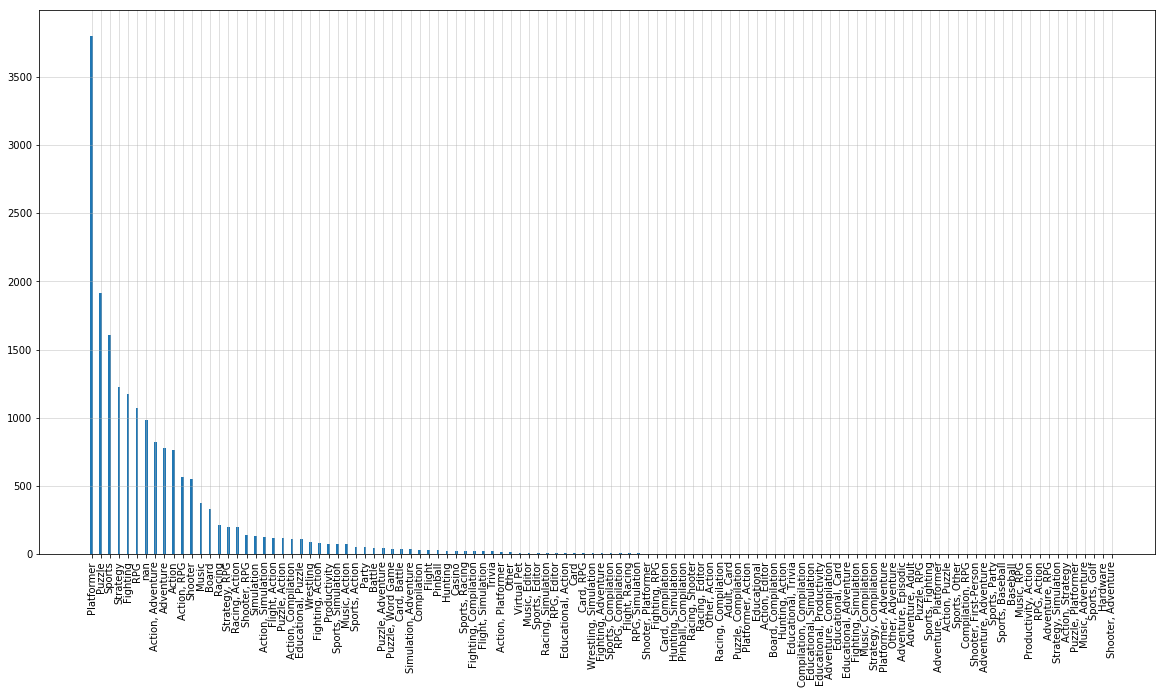

In [22]:
df1=df.dropna(subset=['genre'])
plt.figure(figsize=(20,10))
plt.bar(df1['genre'].unique(),df1['genre'].value_counts(),width=0.3)
plt.xticks(np.arange(len(df['genre'].unique())),df['genre'].unique(),rotation=90)
plt.grid(alpha=0.5)